In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO(uploaded['Dataset.csv'].decode('utf-8')))
df.head()
len(df['New'])

227

In [ ]:
def divition_data(x , t):
  # train 0.6 , test = 0.2 , val = 0.2 with sklearn
  x_train, x_test, t_train, t_test  = sklearn.model_selection.train_test_split(x, t, test_size=0.2, random_state=1)
  x_train, x_validation, t_train, t_validation = sklearn.model_selection.train_test_split(x_train, t_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
  return x_train, t_train, x_validation, t_validation, x_test, t_test

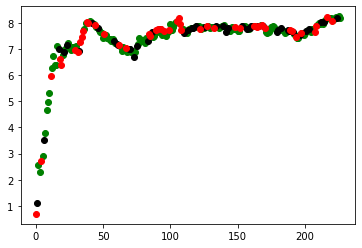

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.model_selection
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


infections= np.log(df['New'].values)
N = len(infections)
x = np.array(range(N))
t = np.array(infections)
x_train, t_train, x_validation, t_validation, x_test, t_test = divition_data(x, t);
plt.plot(x_train, t_train, 'o', color='green')
plt.plot(x_validation, t_validation, 'o', color='black')
plt.plot(x_test, t_test, 'o', color='red')

In [ ]:
def make_2D_matrix(x):
  return np.c_[np.ones((len(x),1)),x]

In [ ]:
def add_row(x):
  new_x = np.c_[x,np.power(x[:,1],x.shape[1])]
  new_x = sc_X.fit_transform(new_x)
  new_x[:,0] = np.ones(x.shape[0])
  return new_x

In [ ]:
def update(x, t, w, alpha):
  N = len(x)
  y = np.dot(x, w)
  w = w - (alpha/(float(N)))*(x.T.dot((y-t)))
  return w

In [ ]:
def cost(x, r, w):
  y = np.dot(x, w)
  return np.sum((y - r)**2) / (2 * len(y)) 

In [ ]:
def train(x, t, w, alpha, epochs):
  for e in range(epochs):
    w = update(x, t, w, alpha)
  return w 

dimention :  1
cost :  0.30892790055955716 validation test  0.47537298378212983
dimention :  2
cost :  0.2296948481841254 validation test  0.34420774742272137
dimention :  3
cost :  0.15647575621239668 validation test  0.23890234667753674
dimention :  4
cost :  0.12740108754203042 validation test  0.1921192202080675
dimention :  5
cost :  0.05462521599457379 validation test  0.09398626409637305
dimention :  6
cost :  0.035360255001868623 validation test  0.0705842617735163
dimention :  7
cost :  0.03135726086611331 validation test  0.06827347325094997
dimention :  8
cost :  0.026182198662382264 validation test  0.0656266738943742
dimention :  9
cost :  0.026089285158063334 validation test  0.06445268319525811
dimention :  10
cost :  0.025487297803982796 validation test  0.06667910066931944
best dimention  9
test cost :  0.29848160452935407


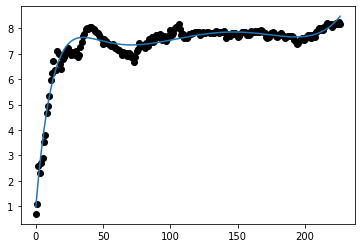

In [ ]:
x = np.array(range(N))
t = np.array(infections)
x_train, t_train, x_validation, t_validation, x_test, t_test = divition_data(x, t);
x_train = make_2D_matrix(x_train)
x = make_2D_matrix(x)
x_validation = make_2D_matrix(x_validation)
x_test = make_2D_matrix(x_test)
print("dimention : ", 1)
plt.plot(np.array(range(N)), t, 'o', color='black')
w = train(x_train, t_train, w=np.zeros(x_train.shape[1]), alpha=0.0001, epochs=1000000)
v = cost(x_validation, t_validation, w)
print("cost : ", cost(x_train, t_train, w), "validation test ", v)
y = np.dot(x, w)

best_w = (1, w)
min_validation = float("inf");
for i in range(2, 11):
  x_train = add_row(x_train)
  x = add_row(x)
  x_validation = add_row(x_validation)
  print("dimention : ", i)
  epochs =  1000000 * i
  w = train(x_train, t_train, w=np.zeros(x_train.shape[1]), alpha=0.0001, epochs=epochs)
  v = cost(x_validation, t_validation, w)
  if v < min_validation : 
    min_validation = v
    best_w = (i, w)
    y = np.dot(x, w)
  print("cost : ", cost(x_train, t_train, w), "validation test ", v)
  

print("best dimention ", best_w[0])
for i in range(1, best_w[0]):
   x_test = add_row(x_test)
v = cost(x_test, t_test, best_w[1])
print("test cost : ", v)
plt.plot( np.array(range(N)), y)